In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pandas as pd

In [2]:
# Constants
sampling_frequency = 50  # Hz
label_name = ["Still", "Walk","Run","Bike","Car","Bus","Train","Subway"]

# Function to load acceleration data and labels
def load_data(path_acc_x_csv, path_acc_y_csv, path_acc_z_csv, path_label_csv):
    df_x = pd.read_csv(path_acc_x_csv, header=None, names=['Acc_x']).apply(pd.to_numeric, errors='coerce')
    df_y = pd.read_csv(path_acc_y_csv, header=None, names=['Acc_y']).apply(pd.to_numeric, errors='coerce')
    df_z = pd.read_csv(path_acc_z_csv, header=None, names=['Acc_z']).apply(pd.to_numeric, errors='coerce')
    df_labels = pd.read_csv(path_label_csv, header=None, names=['Label']).apply(pd.to_numeric, errors='coerce')
    
    df = pd.concat([df_x, df_y, df_z, df_labels], axis=1)
    df['Magnitude'] = np.sqrt(df['Acc_x']**2 + df['Acc_y']**2 + df['Acc_z']**2)
    return df

def plot_spectrogram_from_df(df):
    # Generate time array based on data length and sampling frequency
    time = np.arange(len(df)) / sampling_frequency
    
    # Define spectrogram parameters
    nperseg = 128
    noverlap = 64  # Must be less than nperseg
    
    # Calculate spectrogram for the magnitude
    magnitude = df['Magnitude'].to_numpy(dtype=float)
    f, t, Sxx = spectrogram(magnitude, fs=sampling_frequency, window='hann', nperseg=nperseg, noverlap=noverlap)
    
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')  # Log-scale for magnitude
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.title('Spectrogram of Acceleration Magnitude')
    plt.colorbar(label='Intensity (dB)')
    plt.show()

# Function to perform FFT and plot the frequency domain representation
def plot_frequency_domain(df):
    # Generate time array based on data length and sampling frequency
    time = np.arange(len(df)) / sampling_frequency
    
    # Define spectrogram parameters
    nperseg = 128
    noverlap = 64  # Must be less than nperseg
    
    # Calculate spectrogram for the magnitude
    magnitude = df['Magnitude'].to_numpy(dtype=float)
    f, t, Sxx = spectrogram(magnitude, fs=sampling_frequency, window='hann', nperseg=nperseg, noverlap=noverlap)
    
    plt.figure(figsize=(10, 4))
    # Transpose Sxx to swap time and frequency axes
    plt.pcolormesh(f, t, 10 * np.log10(Sxx.T), shading='gouraud')  # Log-scale for magnitude
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Time (s)')
    plt.title('Spectrogram of Acceleration Magnitude (Axis Swapped)')
    plt.colorbar(label='Intensity (dB)')
    plt.show()

In [3]:
path_acc_x_csv = f"C:\\Users\\huynh\\OneDrive\\Desktop\\test\\AI_1\\archive_data\\Acc_x.csv"
path_acc_y_csv = f"C:\\Users\\huynh\\OneDrive\\Desktop\\test\\AI_1\\archive_data\\Acc_y.csv"
path_acc_z_csv = f"C:\\Users\\huynh\\OneDrive\\Desktop\\test\\AI_1\\archive_data\\Acc_z.csv"
path_label_csv = f"C:\\Users\\huynh\\OneDrive\\Desktop\\test\\AI_1\\archive_data\\Label.csv"

C:\Users\huynh\AppData\Local\Temp\ipykernel_15588\2067690518.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_x = pd.read_csv(path_acc_x_csv, header=None, names=['Acc_x']).apply(pd.to_numeric, errors='coerce')
C:\Users\huynh\AppData\Local\Temp\ipykernel_15588\2067690518.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_y = pd.read_csv(path_acc_y_csv, header=None, names=['Acc_y']).apply(pd.to_numeric, errors='coerce')
C:\Users\huynh\AppData\Local\Temp\ipykernel_15588\2067690518.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_z = pd.read_csv(path_acc_z_csv, header=None, names=['Acc_z']).apply(pd.to_numeric, errors='coerce')
C:\Users\huynh\AppData\Local\Temp\ipykernel_15588\2067690518.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_labels = pd

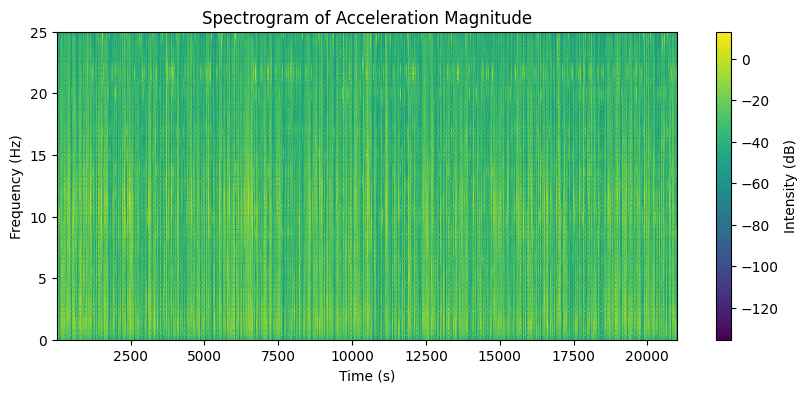

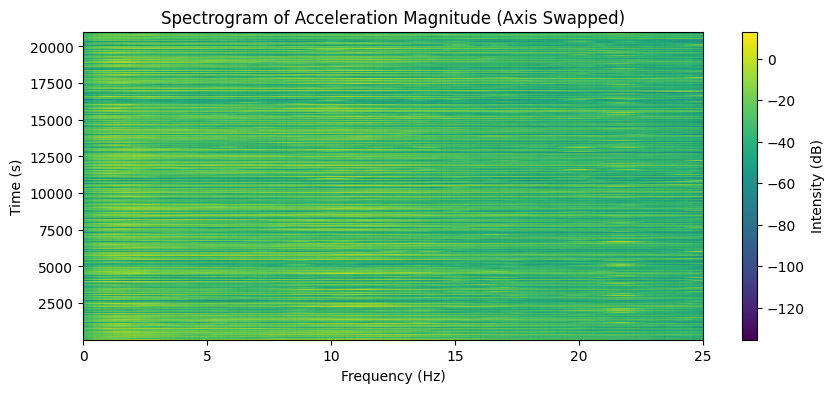

In [4]:
df = load_data(path_acc_x_csv, path_acc_y_csv, path_acc_z_csv, path_label_csv)
df_filter = df[df["Label"] == 6.0]
plot_spectrogram_from_df(df_filter)
plot_frequency_domain(df_filter)

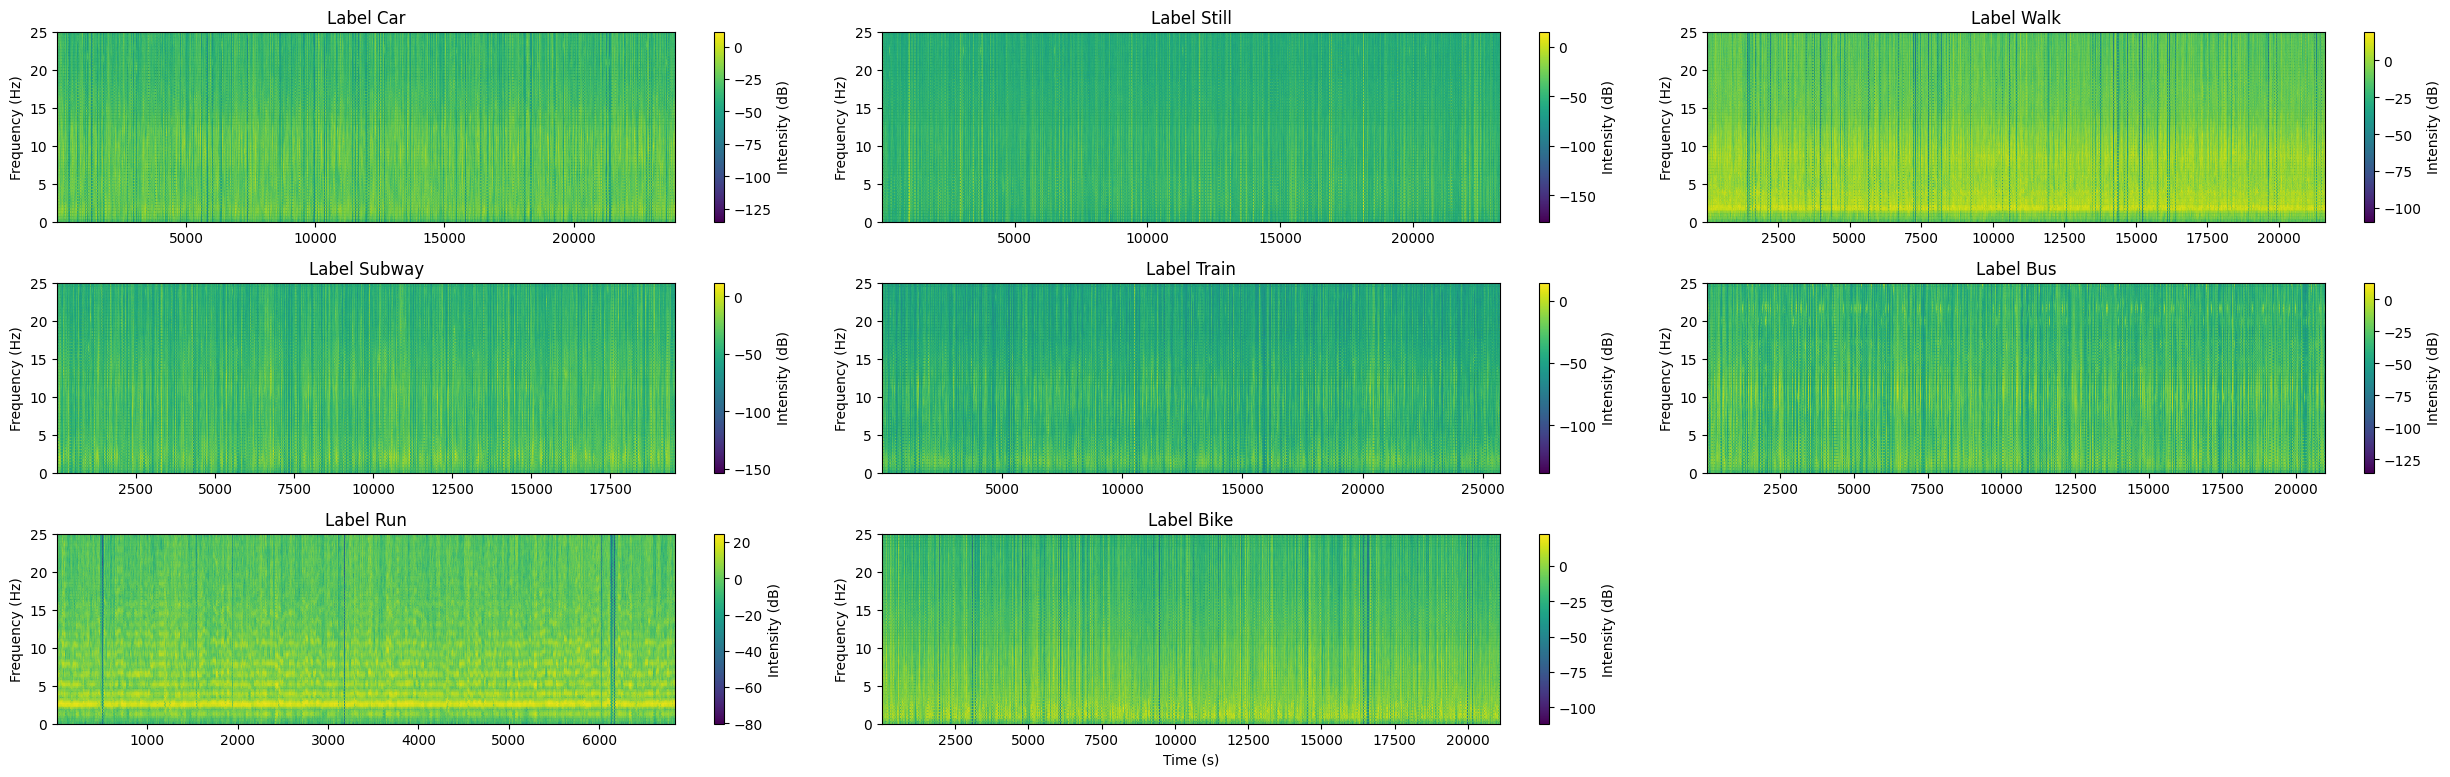

In [7]:
def plot_frequency_domain_by_label(df, labels):
    plt.figure(figsize=(25, 20))
    num_labels = len(labels)
    
    for i, label in enumerate(labels):
        # Filter data for the current label
        df_label = df[df['Label'] == label]
        
        if not df_label.empty:
            magnitude = df_label['Magnitude'].to_numpy(dtype=float)
            f, t, Sxx = spectrogram(magnitude, fs=sampling_frequency, window='hann', nperseg=128, noverlap=64)
            
            # Create subplot
            plt.subplot(num_labels, 3, i + 1)
            plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
            plt.ylabel('Frequency (Hz)')
            plt.title(f'Label {label_name[int(label)-1]}')
            plt.colorbar(label='Intensity (dB)')
    
    plt.xlabel('Time (s)')  
    plt.tight_layout()
    plt.show()
plot_frequency_domain_by_label(df, [5.0, 1.0, 2.0, 8.0, 7.0, 6.0, 3.0, 4.0])
